In [1]:
from file_5 import train_images, test_images, valid_images
from file_6 import train_labels, test_labels, valid_labels
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
len(train_images), len(test_labels)

(6960, 1560)

In [3]:
len(test_images), len(test_labels)

(1560, 1560)

In [4]:
len(valid_images), len(valid_labels)

(1560, 1560)

In [5]:
type(train_images)

tensorflow.python.data.ops.map_op._MapDataset

In [6]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(7000)
train = train.batch(8)
train = train.prefetch(3)

In [7]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2000)
test = test.batch(8)
test = test.prefetch(3)

In [8]:
valid = tf.data.Dataset.zip((valid_images, valid_labels))
valid = valid.shuffle(2000)
valid = valid.batch(8)
valid = valid.prefetch(3)

In [9]:
data_samples = train.as_numpy_iterator()

In [10]:
res = data_samples.next()

In [11]:
res[0]

array([[[[0.34718138, 0.34258577, 0.3127451 ],
         [0.33872548, 0.33890933, 0.30496323],
         [0.32671568, 0.32818627, 0.29681373],
         ...,
         [0.11697304, 0.10373774, 0.1704044 ],
         [0.14197303, 0.12371323, 0.17910539],
         [0.1487745 , 0.12034313, 0.16495098]],

        [[0.33247548, 0.33737746, 0.3064951 ],
         [0.35594362, 0.3608456 , 0.32996324],
         [0.36360294, 0.3675245 , 0.33713236],
         ...,
         [0.15606618, 0.12763481, 0.19773284],
         [0.15949754, 0.13449755, 0.19087009],
         [0.1403799 , 0.11685049, 0.15962009]],

        [[0.31844363, 0.3336397 , 0.31942403],
         [0.343076  , 0.3504289 , 0.33082107],
         [0.36458334, 0.3685049 , 0.34889707],
         ...,
         [0.13272059, 0.12389706, 0.17928922],
         [0.15778187, 0.14148284, 0.20036764],
         [0.13725491, 0.12120098, 0.17610294]],

        ...,

        [[0.48253676, 0.4148897 , 0.3663603 ],
         [0.47549018, 0.4117647 , 0.3612745 ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


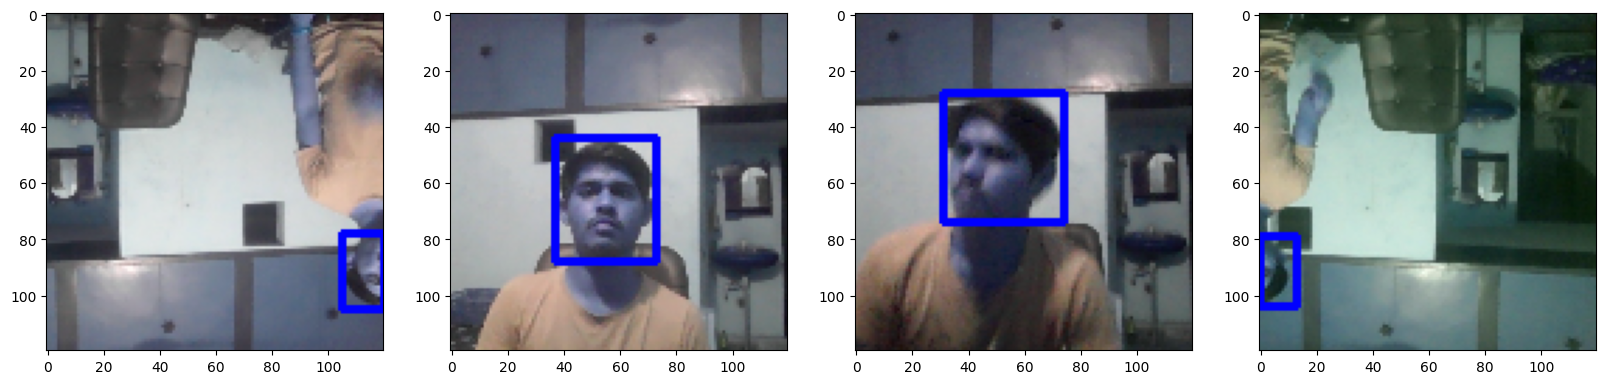

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]

    start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))

    cv2.rectangle(sample_image, start_point, end_point, (255, 0, 0), 2)
    ax[idx].imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

plt.show()